In [1]:
import os 
data_list = os.listdir("C:/Users/HP/DL_Project/Covid_Datasets/two/train")
print(data_list)

['covid', 'normal']


In [2]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model, load_model,Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2,preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions,VGG16,preprocess_input
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import tensorflow as tf

In [3]:
train_datasets ="C:/Users/HP/DL_Project/Covid_Datasets/two/train/"
test_datasets = "C:/Users/HP/DL_Project/Covid_Datasets/two/test/"

In [4]:
image_size =(150,150)
number_class = len(data_list)
batch_size = 10
number_epochs =  10
learningRate = 0.001

In [5]:
train_dataset_generator = ImageDataGenerator(rescale=1./255,
                                            rotation_range=45,
                                            height_shift_range=0.2,
                                            width_shift_range=0.2,
                                            shear_range=0.2,
                                            zoom_range=0.2,
                                            channel_shift_range=20,
                                            horizontal_flip=True,
                                            vertical_flip=True,
                                            validation_split=0.2,
                                            fill_mode="constant",
                                            featurewise_std_normalization=True,
                                            featurewise_center=True)
                                           

In [6]:
train_batches = train_dataset_generator.flow_from_directory(train_datasets,
                                                           target_size=image_size,
                                                           shuffle=True,
                                                           batch_size=batch_size,
                                                           subset='training',
                                                           seed=42,
                                                           class_mode ="binary")

Found 104 images belonging to 2 classes.


In [7]:
validation_batches = train_dataset_generator.flow_from_directory(train_datasets,
                                                           target_size=image_size,
                                                           shuffle=True,
                                                           batch_size=batch_size,
                                                           subset='validation',
                                                           seed=42,
                                                           class_mode ="binary")

Found 26 images belonging to 2 classes.


In [8]:
vgg_model=VGG16(weights = "imagenet",
               include_top = False,
               input_shape=(150,150,3))
vgg_model.trainable = False

In [9]:
model = Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [10]:
model.compile(loss='binary_crossentropy',
             optimizer = Adam(learning_rate = learningRate),
             metrics = ['accuracy'])

In [11]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________
None


In [12]:
print(len(train_batches))
print()
print(len(validation_batches))

11

3


In [13]:
print(train_batches.n)
print()
print(validation_batches.n)

104

26


In [14]:
train_step_size = train_batches.n //train_batches.batch_size
validation_step_size = validation_batches.n //validation_batches.batch_size

In [15]:
model_runing_history = model.fit(train_batches,
                                steps_per_epoch = train_step_size,
                                validation_data = validation_batches,
                                validation_steps = validation_step_size,
                                epochs = number_epochs)

C:\Users\HP\anaconda3\envs\DL\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\HP\anaconda3\envs\DL\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
10/10 [==============================] - ETA: 0s - loss: 1.3187 - accuracy: 0.5638WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000265535A49D8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) 

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

def accuracy_loss_plot(model_data, epochs):
    
    
    acc = model_runing_history.history['accuracy']
    loss = model_runing_history.history['loss']
    val_acc = model_runing_history.history['val_accuracy']
    val_loss = model_runing_history.history['val_loss']
    
    plt.figure(figsize = (20, 8))
    plt.subplot(121)
    plt.plot(range(1, epochs), acc[1:], label = 'Training Accuracy')
    plt.plot(range(1, epochs), val_acc[1:], label = 'Test Accuracy')
    plt.title("Accuracy Over " + str(epochs) + "Epochs", size = 15)
    plt.legend()
    plt.grid(True)
    
    
    
    plt.figure(figsize = (20, 8))
    plt.subplot(122)
    plt.plot(range(1, epochs), loss[1:], label = 'Training Loss')
    plt.plot(range(1, epochs), val_loss[1:], label = 'Test Loss')
    plt.title("Loss Over " + str(epochs) + "Epochs", size = 15)
    plt.legend()
    plt.grid(True)
    
    plt.show()

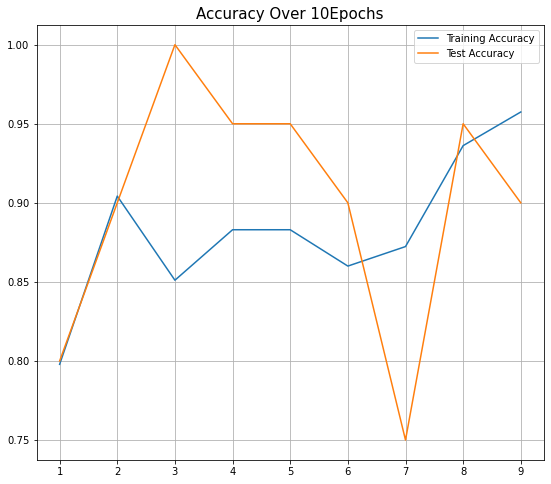

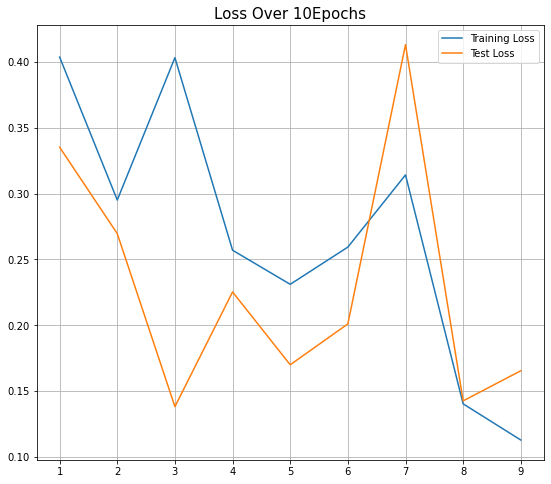

In [17]:
accuracy_loss_plot(model_runing_history, 10)

In [18]:
model.save("covid.h5")

In [19]:
test_datagenrator = ImageDataGenerator(rescale=1./255)
test_batches = test_datagenrator.flow_from_directory(test_datasets,
                                                    target_size=image_size,
                                                    shuffle=False,
                                                    batch_size=1,
                                                    seed=42,
                                                    class_mode ="binary")
test_batches.reset()

Found 18 images belonging to 2 classes.


In [20]:
test_batches.reset()
random_data = model.evaluate(test_batches,
                            steps = int(np.ceil(len(test_batches)/batch_size)),
                             use_multiprocessing=False,
                             verbose=1,
                             workers=1)

2/2 [==============================] - 0s 199ms/step - loss: 0.0449 - accuracy: 1.0000


In [21]:
print("TestDatasets loss: ",random_data[0])
print("TestDatasets Accuracy: ",random_data[1])

TestDatasets loss:  0.04487906023859978
TestDatasets Accuracy:  1.0


In [22]:
test_batches.reset()

In [23]:
predictted = model.predict(test_batches, 1000, verbose=1)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
18/18 [==============================] - 3s 162ms/step


covid\nejmoa2001191_f3-PA.jpeg


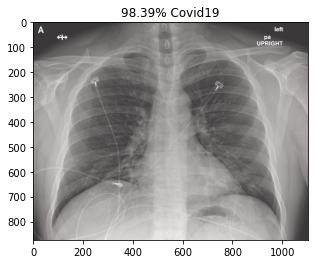

covid\nejmoa2001191_f4.jpeg


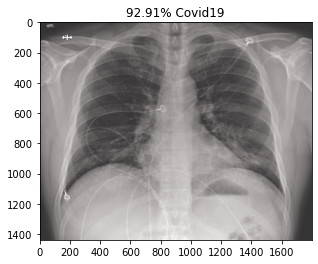

covid\nejmoa2001191_f5-PA.jpeg


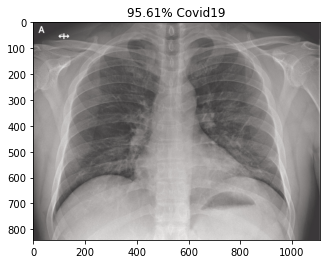

covid\radiol.2020200490.fig3.jpeg


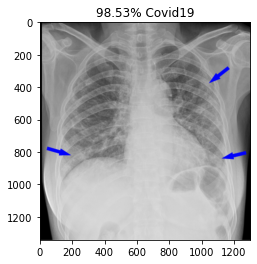

covid\ryct.2020200028.fig1a.jpeg


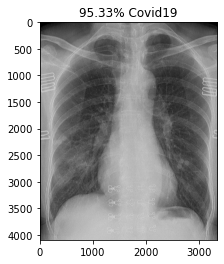

covid\ryct.2020200034.fig2.jpeg


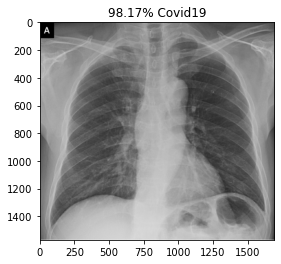

covid\ryct.2020200034.fig5-day0.jpeg


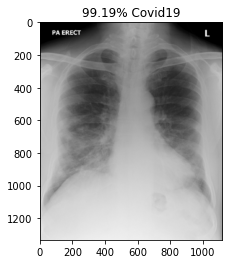

covid\ryct.2020200034.fig5-day4.jpeg


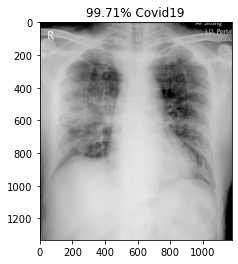

covid\ryct.2020200034.fig5-day7.jpeg


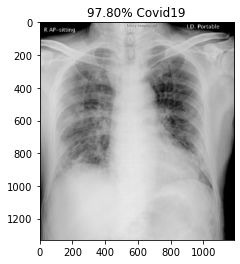

normal\NORMAL2-IM-1385-0001.jpeg


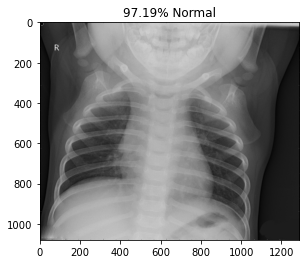

normal\NORMAL2-IM-1396-0001.jpeg


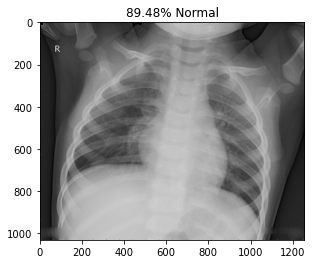

normal\NORMAL2-IM-1400-0001.jpeg


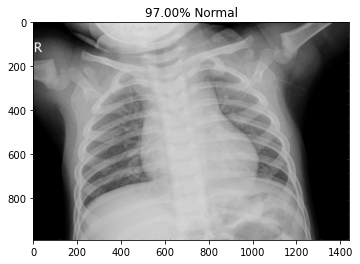

normal\NORMAL2-IM-1401-0001.jpeg


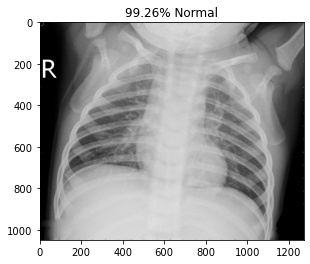

normal\NORMAL2-IM-1406-0001.jpeg


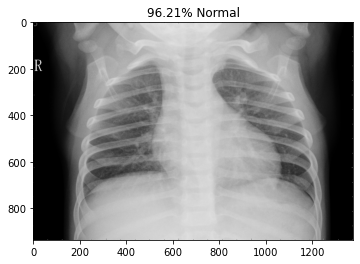

normal\NORMAL2-IM-1412-0001.jpeg


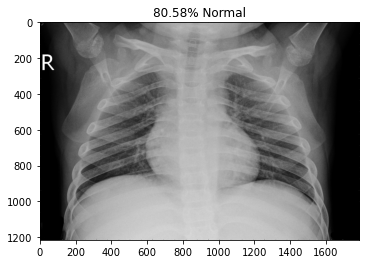

normal\NORMAL2-IM-1419-0001.jpeg


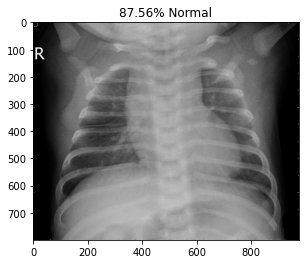

normal\NORMAL2-IM-1422-0001.jpeg


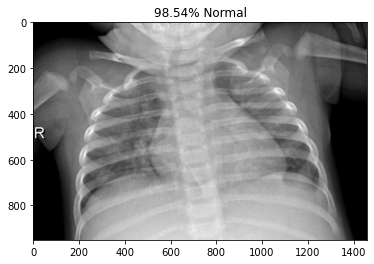

normal\NORMAL2-IM-1423-0001.jpeg


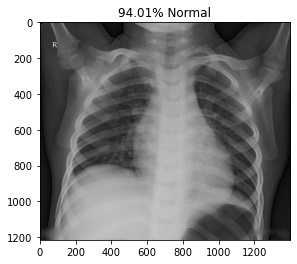

In [24]:
import cv2
import matplotlib.image as mat_image

for index, prob_value in enumerate(predictted):
    image_path = test_datasets + "/"+ test_batches.filenames[index]
    image = mat_image.imread(image_path)
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    pixel = np.array(image)
    plt.imshow(pixel)
    print(test_batches.filenames[index])
    
    if prob_value > 0.5:
        plt.title("%.2f" % (prob_value[0]*100) + "% Normal")
    else:
        plt.title("%.2f" % ((1 - prob_value[0])*100) + "% Covid19")
        
    plt.show()